**전국 반려동물 시설 분석**
***

## 데이터 분석과 시각화를 위한 설정

In [196]:
import pandas as pd                # 데이터 분석을 위해 pandas
import numpy as np                 # 수치계산을 위해 numpy
import matplotlib.pyplot as plt    # 시각화를 위해 mapplotlib, seaborn를 불러온다.
import seaborn as sns
import folium                      # 지도 시각화를 위한 라이브러리
import json

# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 파일 열기

In [197]:
# CSV 파일 읽기
df = pd.read_csv('data/data.csv', encoding='cp949')

## 데이터 전처리

In [ ]:
df.info()

In [198]:
df.isnull().sum()

시설명                 0
카테고리1               0
카테고리2               0
카테고리3               0
시도 명칭               0
시군구 명칭            145
법정읍면동명칭            44
리 명칭            19134
번지                 57
도로명 이름            306
건물 번호             306
위도                  0
경도                  0
우편번호               72
도로명주소             306
지번주소                0
전화번호                0
홈페이지                0
휴무일                 0
운영시간                0
주차 가능여부             0
입장(이용료)가격 정보        0
반려동물 동반 가능정보        0
반려동물 전용 정보          0
입장 가능 동물 크기         0
반려동물 제한사항           0
장소(실내) 여부           0
장소(실외)여부            0
기본 정보_장소설명          0
애견 동반 추가 요금         0
최종작성일               0
dtype: int64

### 데이터 확인

In [199]:
df.columns

Index(['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '번지', '도로명 이름', '건물 번호', '위도', '경도', '우편번호', '도로명주소', '지번주소', '전화번호',
       '홈페이지', '휴무일', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보',
       '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일'],
      dtype='object')

In [200]:
df['카테고리3'].unique()

array(['동물약국', '미술관', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당',
       '여행지', '위탁관리', '박물관', '호텔'], dtype=object)

In [201]:
df['시도 명칭'].unique()

array(['경기도', '전라남도', '서울특별시', '인천광역시', '경상북도', '대구광역시', '세종특별자치시',
       '전라북도', '경상남도', '강원도', '부산광역시', '광주광역시', '대전광역시', '충청북도',
       '제주특별자치도', '충청남도', '울산광역시'], dtype=object)

In [202]:
df['주차 가능여부'].unique()

array(['주차가능', '주차 불가'], dtype=object)

In [203]:
df['반려동물 동반 가능정보'].unique()

array(['동반가능', '동반불가'], dtype=object)

In [204]:
df['반려동물 전용 정보'].unique()

array(['해당없음', '반려동물 전용'], dtype=object)

In [205]:
# df['애견 동반 추가 요금'].unique()

In [206]:
# df['입장 가능 동물 크기'].unique()

In [207]:
# df['반려동물 제한사항'].unique()

In [208]:
df['카테고리1'].unique()

array(['반려동물업'], dtype=object)

In [209]:
df['카테고리2'].unique()

array(['반려의료', '반려동반여행', '반려동물식당카페', '반려동물 서비스', '반려문화시설'], dtype=object)

### 동반 가능한 곳만 데이터 추려내기

In [210]:
df.shape

(23929, 31)

In [211]:
filter = df['반려동물 동반 가능정보'] == '동반가능'
df = df[filter]
df.shape

(21139, 31)

### 컬럼명 변경하고 사용하지 않는 데이터 제거

In [212]:
columns = ['시설명', '시도 명칭', '시군구 명칭', '카테고리3', '위도', '경도', '도로명주소',
            '지번주소', '전화번호', '홈페이지', '휴무일', '운영시간',
            '주차 가능여부', '입장(이용료)가격 정보', '입장 가능 동물 크기',
            '반려동물 제한사항', '기본 정보_장소설명', '애견 동반 추가 요금']
columns

['시설명',
 '시도 명칭',
 '시군구 명칭',
 '카테고리3',
 '위도',
 '경도',
 '도로명주소',
 '지번주소',
 '전화번호',
 '홈페이지',
 '휴무일',
 '운영시간',
 '주차 가능여부',
 '입장(이용료)가격 정보',
 '입장 가능 동물 크기',
 '반려동물 제한사항',
 '기본 정보_장소설명',
 '애견 동반 추가 요금']

In [213]:
df = df[columns].copy()

In [214]:
# 새로운 컬럼 이름
col_names = ['시설명', '행정구역', '시군구', '시설분류', '위도', '경도', '도로명주소',
             '지번주소', '전화번호', '홈페이지', '휴무일', '운영시간',
            '주차가능여부', '이용료정보', '크기제한', '기타제한사항',
            '장소요약', '동반시추가요금']
col_names

['시설명',
 '행정구역',
 '시군구',
 '시설분류',
 '위도',
 '경도',
 '도로명주소',
 '지번주소',
 '전화번호',
 '홈페이지',
 '휴무일',
 '운영시간',
 '주차가능여부',
 '이용료정보',
 '크기제한',
 '기타제한사항',
 '장소요약',
 '동반시추가요금']

In [215]:
df.columns = col_names

In [216]:
df.head(5)

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음
2,100세건강약국,경기도,안양시 만안구,동물약국,37.407150,126.914837,경기도 안양시 만안구 안양로 408,경기도 안양시 만안구 안양동 856-4,031-465-1320,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~21:00, 토 09:00~20:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
3,100세약국,서울특별시,영등포구,동물약국,37.533260,126.903741,서울특별시 영등포구 양평로 24,서울특별시 영등포구 당산동6가 217-4,02-2678-8217,정보없음,"매주 일요일, 법정공휴일","월~금 08:30~21:00, 토 08:30~18:30",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
4,100세약국,경기도,수원시 팔달구,동물약국,37.276272,127.030911,경기도 수원시 팔달구 경수대로 568,경기도 수원시 팔달구 인계동 942-4,031-239-4801,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~19:00, 토 09:00~15:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
5,100세약국,인천광역시,남동구,동물약국,37.462072,126.708644,인천광역시 남동구 남동대로 892,인천광역시 남동구 간석동 207-3,032-427-7585,정보없음,"매주 토, 일",월~금 08:30~22:00,주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음


In [217]:
df['행정구역'].describe()

count     21139
unique       17
top         경기도
freq       5918
Name: 행정구역, dtype: object

In [218]:
df['시설분류'].describe()

count     21139
unique       13
top        동물약국
freq       8440
Name: 시설분류, dtype: object

In [219]:
df['시설분류'].unique()

array(['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당', '여행지',
       '위탁관리', '박물관', '미술관', '호텔'], dtype=object)

In [220]:
# df.dtypes

### 중복확인

In [221]:
df.duplicated().sum()

0

## 결측치 확인

### 결측치 합계

In [222]:
df.isnull().sum()

시설명          0
행정구역         0
시군구        134
시설분류         0
위도           0
경도           0
도로명주소      306
지번주소         0
전화번호         0
홈페이지         0
휴무일          0
운영시간         0
주차가능여부       0
이용료정보        0
크기제한         0
기타제한사항       0
장소요약         0
동반시추가요금      0
dtype: int64

### 결측치 비율

In [223]:
df.isnull().mean() * 100

시설명        0.000000
행정구역       0.000000
시군구        0.633899
시설분류       0.000000
위도         0.000000
경도         0.000000
도로명주소      1.447561
지번주소       0.000000
전화번호       0.000000
홈페이지       0.000000
휴무일        0.000000
운영시간       0.000000
주차가능여부     0.000000
이용료정보      0.000000
크기제한       0.000000
기타제한사항     0.000000
장소요약       0.000000
동반시추가요금    0.000000
dtype: float64

### 도로명주소 결측치값 '정보없음'으로 변경

In [224]:
df['도로명주소'] = df['도로명주소'].fillna('정보없음')

In [225]:
(df['도로명주소'] == '정보없음').sum()

306

## 파일 저장하기

In [226]:
df.to_csv('data/animal_facility.csv', encoding='cp949', index=False)

## 파일 불러오기

In [231]:
df = pd.read_csv('data/animal_facility.csv', encoding='cp949')

In [232]:
df

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음
1,100세건강약국,경기도,안양시 만안구,동물약국,37.407150,126.914837,경기도 안양시 만안구 안양로 408,경기도 안양시 만안구 안양동 856-4,031-465-1320,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~21:00, 토 09:00~20:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
2,100세약국,서울특별시,영등포구,동물약국,37.533260,126.903741,서울특별시 영등포구 양평로 24,서울특별시 영등포구 당산동6가 217-4,02-2678-8217,정보없음,"매주 일요일, 법정공휴일","월~금 08:30~21:00, 토 08:30~18:30",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
3,100세약국,경기도,수원시 팔달구,동물약국,37.276272,127.030911,경기도 수원시 팔달구 경수대로 568,경기도 수원시 팔달구 인계동 942-4,031-239-4801,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~19:00, 토 09:00~15:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
4,100세약국,인천광역시,남동구,동물약국,37.462072,126.708644,인천광역시 남동구 남동대로 892,인천광역시 남동구 간석동 207-3,032-427-7585,정보없음,"매주 토, 일",월~금 08:30~22:00,주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,y동물병원,대구광역시,수성구,동물병원,35.842243,128.697815,대구광역시 수성구 달구벌대로 3116-1,대구광역시 수성구 시지동 258-14,053-791-7532,정보없음,매주 일요일,"월~금 09:30~19:00, 토 09:30~18:30",주차가능,변동,모두 가능,제한사항 없음,"일반동물병원, 일요일 야간 예약진료 가능",없음
21135,YOLO오시개,부산광역시,사상구,카페,35.150589,129.012454,부산광역시 사상구 가야대로366번길 10,부산광역시 사상구 주례동 60-55,0507-1318-4786,http://instagram.com/yolo_playdogs,매주 화요일,수~월 13:00~20:00,주차가능,10000원,모두 가능,제한사항 없음,"애견카페, 호텔","2,000~6,000원"
21136,YS유통,경기도,파주시,반려동물용품,37.751561,126.844647,경기도 파주시 조리읍 장곡로 120-35,경기도 파주시 조리읍 장곡리 73-3,031-942-8377,http://www.irina.co.kr/,"매주 토, 일",월~금 10:00~17:00,주차가능,없음,모두 가능,제한사항 없음,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음
21137,ZOO동물병원,서울특별시,성북구,동물병원,37.601998,127.019541,서울특별시 성북구 정릉로 328,서울특별시 성북구 정릉동 16-162,02-914-5545,정보없음,매주 일요일,"월~금 10:00~19:00, 토 10:00~17:00",주차 불가,변동,모두 가능,제한사항 없음,일반동물병원,없음


## 두개의 수치 비교 데이터

In [234]:
ulsan_df = df[df['행정구역'] == '울산광역시']

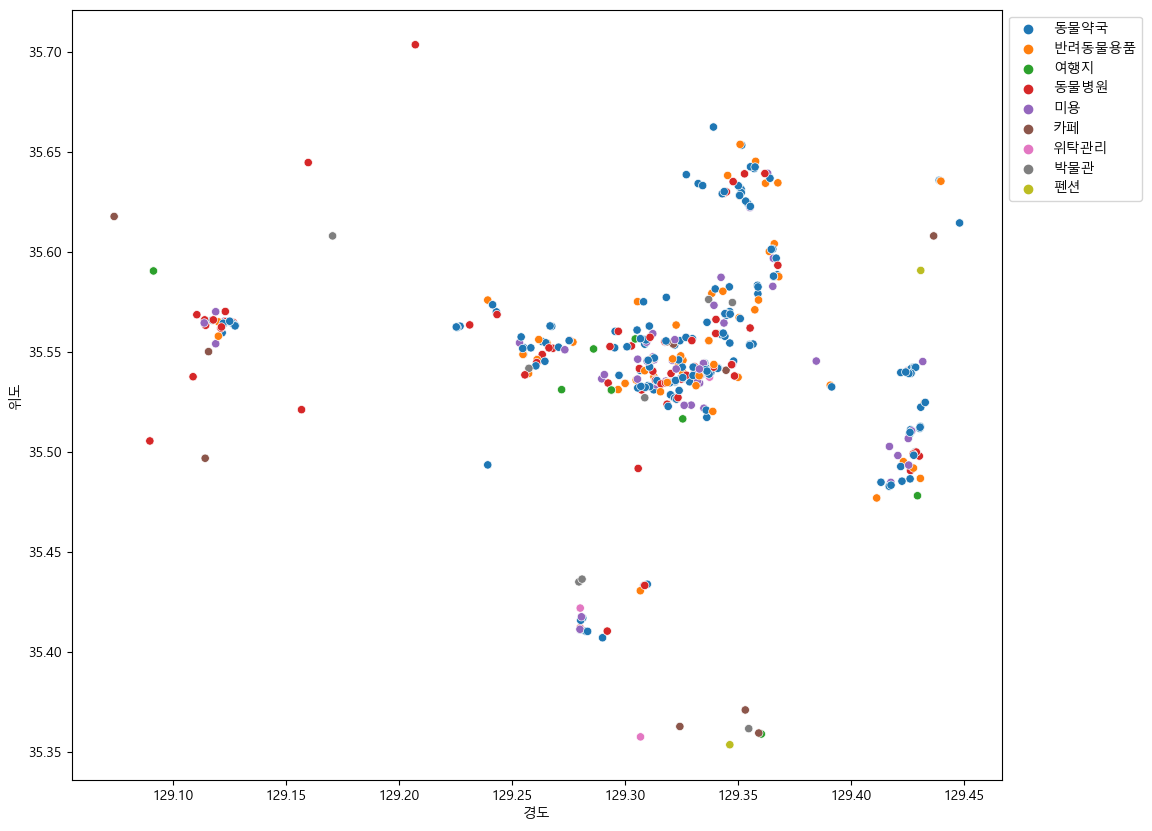

In [235]:
plt.figure(figsize=(12, 10)) # 도화지를 그리고(도화지사이즈)

sns.scatterplot(data=ulsan_df, x='경도', y='위도', hue='시설분류')
plt.legend(bbox_to_anchor=(1,1))

***
***
***
↓↓↓↓↓↓↓↓↓↓↓↓↓ **여기는 테스트 지워도됨** ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

## 테스트

### 울산광역시

In [ ]:
ulsan_df = df[df['행정구역'] == '울산광역시']

In [ ]:
lat = ulsan_df['위도'].mean()
lng = ulsan_df['경도'].mean()

In [ ]:
# map = folium.Map(location=[lat, lng], zoom_start=10)

# # 마커 표시
# for row in ulsan_df.index:
#     lat = df.loc[row, '위도']
#     lng = df.loc[row, '경도']
#     facility_name = df.loc[row, '시설명']
    
#     folium.Marker(
#         location=[lat, lng],
#         tooltip=facility_name,
#         icon=folium.Icon(icon='cloud'),
#         ).add_to(map)
    
# # LayerControl 추가
# folium.LayerControl().add_to(map)
# map

In [ ]:
import folium

# 울산광역시의 경도와 위도 평균 계산
lat = ulsan_df['위도'].mean()
lng = ulsan_df['경도'].mean()

# Folium을 사용하여 지도 생성
map = folium.Map(location=[lat, lng], zoom_start=10)

# 시설분류 리스트
facilities = ['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관',
              '펜션', '식당', '여행지', '위탁관리', '박물관', '미술관', '호텔']

# 레이어 생성
layer_dict = {}  # 각 시설분류에 해당하는 레이어를 담을 딕셔너리

# 시설분류 별로 레이어 생성 및 마커 추가
for facility in facilities:
    layer_dict[facility] = folium.FeatureGroup(name=facility)  # 시설분류를 이름으로 하는 레이어 생성
    
    # 해당 시설분류에 해당하는 마커 추가
    for index, row in ulsan_df[ulsan_df['시설분류'] == facility].iterrows():
        lat = row['위도']
        lng = row['경도']
        facility_name = row['시설분류']
        
        folium.Marker(
            location=[lat, lng],
            tooltip=row['시설명'],
            icon=folium.Icon(icon='cloud'),
        ).add_to(layer_dict[facility])  # 해당 레이어에 마커 추가

# 모든 레이어를 지도에 추가
for layer in layer_dict.values():
    layer.add_to(map)

# LayerControl을 시설분류로 추가
folium.LayerControl().add_to(map)

# 지도 표시
map


In [ ]:
# import folium

# # 울산광역시의 경도와 위도 평균 계산
# lat = ulsan_df['위도'].mean()
# lng = ulsan_df['경도'].mean()

# # Folium을 사용하여 지도 생성
# map = folium.Map(location=[lat, lng], zoom_start=10)

# # 시설분류 리스트
# facilities = ['동물약국', '카페', '동물병원', '반려동물용품', '미용', '문예회관', '펜션', '식당', '여행지', '위탁관리', '박물관', '미술관', '호텔']

# # 레이어 생성
# layer_dict = {}  # 각 시설분류에 해당하는 레이어를 담을 딕셔너리

# # 시설분류 별로 레이어 생성 및 마커 추가
# for facility in facilities:
#     layer_dict[facility] = folium.FeatureGroup(name=facility)  # 시설분류를 이름으로 하는 레이어 생성
    
#     # 해당 시설분류에 해당하는 마커 추가
#     for index, row in ulsan_df[ulsan_df['시설분류'] == facility].iterrows():
#         lat = row['위도']
#         lng = row['경도']
#         facility_name = row['시설분류']
        
#         # 시설별로 아이콘 선택
#         if facility == '동물약국':
#             icon_type = 'hospital'
#         elif facility == '카페':
#             icon_type = 'coffee'
#         else:
#             icon_type = 'cloud'  # 기본 아이콘은 구름으로 설정
        
#         folium.Marker(
#             location=[lat, lng],
#             tooltip=facility_name,
#             icon=folium.Icon(icon=icon_type),
#         ).add_to(layer_dict[facility])  # 해당 레이어에 마커 추가

# # 모든 레이어를 지도에 추가
# for layer in layer_dict.values():
#     layer.add_to(map)

# # LayerControl 추가
# folium.LayerControl().add_to(map)

# # 지도 표시
# map


In [236]:
df

,시설명,행정구역,시군구,시설분류,위도,경도,도로명주소,지번주소,전화번호,홈페이지,휴무일,운영시간,주차가능여부,이용료정보,크기제한,기타제한사항,장소요약,동반시추가요금
0,1004 약국,경기도,고양시 덕양구,동물약국,37.644543,126.886336,경기도 고양시 덕양구 동세로 19,경기도 고양시 덕양구 동산동 352-1,02-381-5052,정보없음,"매주 토, 일, 법정공휴일",월~금 09:00~18:00,주차가능,변동,모두 가능,제한사항 없음,동물약국,없음
1,100세건강약국,경기도,안양시 만안구,동물약국,37.407150,126.914837,경기도 안양시 만안구 안양로 408,경기도 안양시 만안구 안양동 856-4,031-465-1320,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~21:00, 토 09:00~20:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
2,100세약국,서울특별시,영등포구,동물약국,37.533260,126.903741,서울특별시 영등포구 양평로 24,서울특별시 영등포구 당산동6가 217-4,02-2678-8217,정보없음,"매주 일요일, 법정공휴일","월~금 08:30~21:00, 토 08:30~18:30",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
3,100세약국,경기도,수원시 팔달구,동물약국,37.276272,127.030911,경기도 수원시 팔달구 경수대로 568,경기도 수원시 팔달구 인계동 942-4,031-239-4801,정보없음,"매주 일요일, 법정공휴일","월~금 09:00~19:00, 토 09:00~15:00",주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
4,100세약국,인천광역시,남동구,동물약국,37.462072,126.708644,인천광역시 남동구 남동대로 892,인천광역시 남동구 간석동 207-3,032-427-7585,정보없음,"매주 토, 일",월~금 08:30~22:00,주차 불가,변동,모두 가능,제한사항 없음,동물약국,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21134,y동물병원,대구광역시,수성구,동물병원,35.842243,128.697815,대구광역시 수성구 달구벌대로 3116-1,대구광역시 수성구 시지동 258-14,053-791-7532,정보없음,매주 일요일,"월~금 09:30~19:00, 토 09:30~18:30",주차가능,변동,모두 가능,제한사항 없음,"일반동물병원, 일요일 야간 예약진료 가능",없음
21135,YOLO오시개,부산광역시,사상구,카페,35.150589,129.012454,부산광역시 사상구 가야대로366번길 10,부산광역시 사상구 주례동 60-55,0507-1318-4786,http://instagram.com/yolo_playdogs,매주 화요일,수~월 13:00~20:00,주차가능,10000원,모두 가능,제한사항 없음,"애견카페, 호텔","2,000~6,000원"
21136,YS유통,경기도,파주시,반려동물용품,37.751561,126.844647,경기도 파주시 조리읍 장곡로 120-35,경기도 파주시 조리읍 장곡리 73-3,031-942-8377,http://www.irina.co.kr/,"매주 토, 일",월~금 10:00~17:00,주차가능,없음,모두 가능,제한사항 없음,"온라인쇼핑몰, 강아지용품, 반려동물 원목가구",없음
21137,ZOO동물병원,서울특별시,성북구,동물병원,37.601998,127.019541,서울특별시 성북구 정릉로 328,서울특별시 성북구 정릉동 16-162,02-914-5545,정보없음,매주 일요일,"월~금 10:00~19:00, 토 10:00~17:00",주차 불가,변동,모두 가능,제한사항 없음,일반동물병원,없음


In [237]:
grouped = df.groupby(by='행정구역').size().reset_index(name='시설 개수')

In [238]:
grouped

,행정구역,시설 개수
0,강원도,689
1,경기도,5918
2,경상남도,1280
3,경상북도,931
4,광주광역시,526
5,대구광역시,895
6,대전광역시,576
7,부산광역시,1310
8,서울특별시,3915
9,세종특별자치시,134


<Axes: xlabel='시설 개수', ylabel='행정구역'>

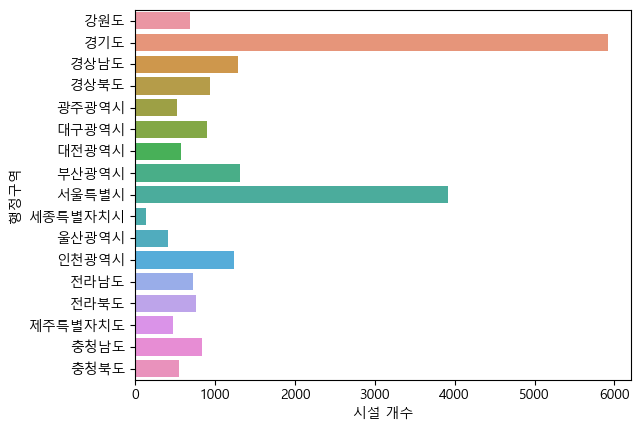

In [253]:
sns.barplot(data=grouped, x='시설 개수', y='행정구역')

<Axes: xlabel='count', ylabel='행정구역'>

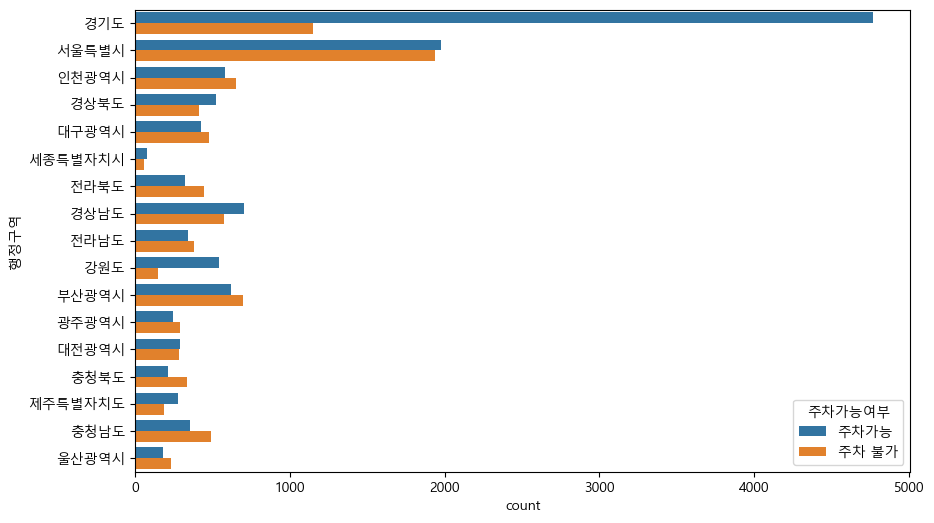

In [262]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='행정구역', hue='주차가능여부')